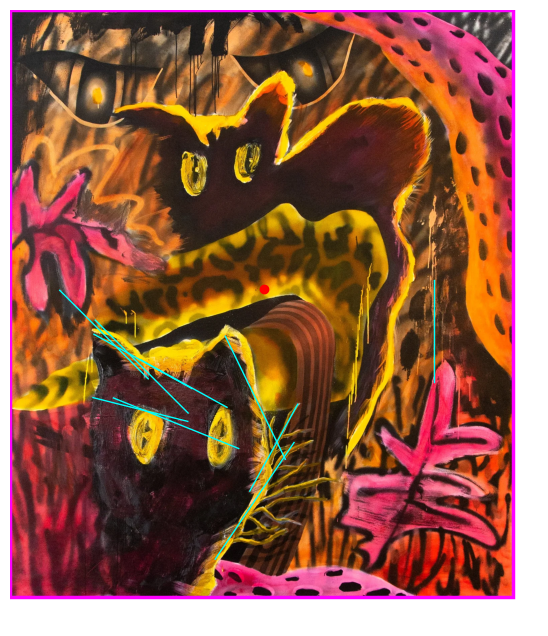


=== MICRO LESSON ===
 This piece embodies expressionist aesthetics with warm tones and softly balanced energy. Texture intensity: 60.48, color variation: 69.3, and 16 structural lines detected.

=== DEEP LESSON ===
 The composition reflects a expressionist sensibility. The visual energy is high, characterized by vivid contrast and a focal region near (0, 0). The palette leans warm, with dominant hues around (np.int64(158), np.int64(84), np.int64(50)).

=== STYLE CLASSIFICATION ===
 Expressionist

=== INTERPRETATION ===
 This artwork seems to explore inner turbulence and raw feeling through warm chromatic values and high visual rhythm. The balance between vivid contrast and subtle structure suggests an interest in evokes comfort, vitality, or human warmth. The artist’s intent may involve an exploration of dynamic and restless, as if the composition is alive with motion and perception itself.

Dominant Colors (RGB): [(50, 30, 23), (102, 56, 37), (172, 84, 44), (238, 155, 28), (229, 99, 

In [1]:
# ===========================================
# DYNAMIC ARTWORK ANALYZER v3 (with Interpretation)
# ===========================================
# Works entirely offline — uses real image metrics for interpretation.

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -------------------------
# 1. Utility: Load Image
# -------------------------
def load_image(path):
    try:
        image = Image.open(path).convert("RGB")
        return np.array(image)
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

# -------------------------
# 2. Color Analysis
# -------------------------
def analyze_color(img, k=5):
    data = img.reshape((-1,3))
    data = np.float32(data)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 25, 0.2)
    _, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    centers = np.uint8(centers)
    counts = np.bincount(labels.flatten())
    order = np.argsort(-counts)
    colors = [tuple(map(int, centers[i])) for i in order]
    color_var = float(np.std(centers))
    return colors, color_var

# -------------------------
# 3. Texture Analysis
# -------------------------
def analyze_texture(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    grad = np.sqrt(gx**2 + gy**2)
    density = np.mean(grad)
    contrast = np.std(grad)
    mask = grad > np.percentile(grad, 99)
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 400]
    return density, contrast, boxes[:3]

# -------------------------
# 4. Composition
# -------------------------
def analyze_composition(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 80, 200)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100,
                            minLineLength=gray.shape[1]//6, maxLineGap=15)
    lines = [tuple(l[0]) for l in lines] if lines is not None else []
    Y,X = np.indices(gray.shape)
    weights = gray.astype(float) + 1
    cx = int(np.sum(X*weights)/np.sum(weights))
    cy = int(np.sum(Y*weights)/np.sum(weights))
    return (cx,cy), lines

# -------------------------
# 5. Subject Detection
# -------------------------
def detect_subject(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    _,th = cv2.threshold(blur, np.mean(blur), 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest = max(contours, key=cv2.contourArea)
        x,y,w,h = cv2.boundingRect(largest)
        return (x,y,w,h)
    else:
        h,w = gray.shape
        return (w//4, h//4, w//2, h//2)

# -------------------------
# 6. Dynamic Style Classification
# -------------------------
def classify_style(texture_density, color_var, num_lines, contrast):
    if texture_density < 10 and color_var < 35:
        return "Minimalist"
    elif contrast < 15 and num_lines < 15:
        return "Photorealist"
    elif texture_density < 25 and color_var > 40:
        return "Realist"
    elif texture_density < 40 and num_lines < 60:
        return "Impressionist"
    elif texture_density >= 40 or color_var > 75:
        return "Expressionist"
    else:
        return "Abstract"

# -------------------------
# 7. Text Summaries
# -------------------------
def generate_text_summary(style, texture_density, color_var, num_lines, contrast, bbox, colors):
    avg_color = tuple(np.mean(colors, axis=0).astype(int))
    tone = "warm" if avg_color[0] > avg_color[2] else "cool"
    balance = "structured" if num_lines > 40 else "softly balanced"
    energy = "high" if texture_density > 35 else "calm"
    depth = "vivid contrast" if contrast > 25 else "muted depth"

    micro = (
        f"This piece embodies {style.lower()} aesthetics with {tone} tones and {balance} energy. "
        f"Texture intensity: {texture_density:.2f}, color variation: {color_var:.1f}, "
        f"and {num_lines} structural lines detected."
    )

    deep = (
        f"The composition reflects a {style.lower()} sensibility. "
        f"The visual energy is {energy}, characterized by {depth} and "
        f"a focal region near {bbox[:2]}. "
        f"The palette leans {tone}, with dominant hues around {avg_color}."
    )

    # --- AI-style interpretation ---
    interpretation = generate_interpretation(style, texture_density, color_var, num_lines, tone, energy, depth)

    return micro, deep, interpretation

# -------------------------
# 8. Interpretation Paragraph (Human-style)
# -------------------------
def generate_interpretation(style, texture_density, color_var, num_lines, tone, energy, depth):
    themes = {
        "Minimalist": "simplicity and restraint",
        "Photorealist": "precise representation of reality",
        "Realist": "grounded observation and quiet emotion",
        "Impressionist": "fleeting light and emotional immediacy",
        "Expressionist": "inner turbulence and raw feeling",
        "Abstract": "shape, color, and rhythm detached from form"
    }

    mood = {
        "warm": "evokes comfort, vitality, or human warmth",
        "cool": "suggests distance, contemplation, or melancholy"
    }

    movement = {
        "high": "dynamic and restless, as if the composition is alive with motion",
        "calm": "controlled and meditative, inviting slower perception"
    }

    return (
        f"This artwork seems to explore {themes.get(style, 'complex emotional undertones')} "
        f"through {tone} chromatic values and {energy} visual rhythm. "
        f"The balance between {depth} and subtle structure suggests an interest in {mood[tone]}. "
        f"The artist’s intent may involve an exploration of {movement[energy]} and perception itself."
    )

# -------------------------
# 9. Main Pipeline
# -------------------------
def run_artwork_pipeline(image_path):
    img = load_image(image_path)
    if img is None:
        return

    colors, color_var = analyze_color(img)
    texture_density, texture_contrast, boxes = analyze_texture(img)
    focal, lines = analyze_composition(img)
    bbox = detect_subject(img)
    style = classify_style(texture_density, color_var, len(lines), texture_contrast)
    micro, deep, interpretation = generate_text_summary(
        style, texture_density, color_var, len(lines), texture_contrast, bbox, colors
    )

    # --- Visualization ---
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(img)
    for (x,y,w,h) in boxes:
        ax.add_patch(patches.Rectangle((x,y),w,h, linewidth=2, edgecolor='yellow', facecolor='none'))
    (x,y,w,h) = bbox
    ax.add_patch(patches.Rectangle((x,y),w,h, linewidth=2.5, edgecolor='magenta', facecolor='none'))
    for (x1,y1,x2,y2) in lines[:10]:
        ax.plot([x1,x2],[y1,y2], color='cyan', linewidth=1.0)
    ax.plot(focal[0], focal[1], 'ro', markersize=6)
    ax.axis('off')
    plt.show()

    print("\n=== MICRO LESSON ===\n", micro)
    print("\n=== DEEP LESSON ===\n", deep)
    print("\n=== STYLE CLASSIFICATION ===\n", style)
    print("\n=== INTERPRETATION ===\n", interpretation)
    print("\nDominant Colors (RGB):", colors)

# -------------------------
# 10. Run with Your Artwork
# -------------------------
# Example path: update this for each new image
image_path = "/Users/alievanayasso/Documents/SlowMA/Natalie westbrook zynka.webp"
run_artwork_pipeline(image_path)
